-------------------------------
### Classification - using mnist data

- Loads the MNIST dataset.
- Preprocesses the images and labels (normalizing the images to [0, 1] and one-hot encoding the labels).
- Defines a simple MLP model with two hidden layers.
- Compiles and trains the model.
- Evaluates the model on the test dataset.
- Plots the training and validation accuracy and loss over epochs.
-----------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Flatten

from keras.utils import to_categorical, plot_model

In [23]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

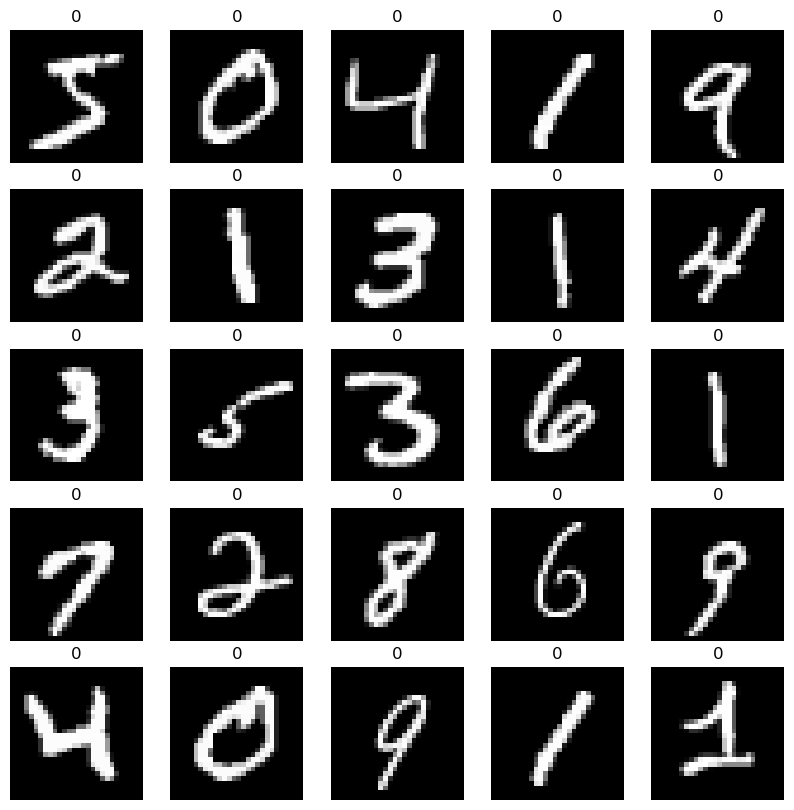

In [26]:
# Plot some samples from MNIST
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(str(np.argmax(train_labels[i])))
    plt.axis('off')

In [27]:
# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images  =  test_images.astype('float32') / 255.0

In [28]:
 train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
to_categorical(train_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [30]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [31]:
# Define the MLP model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10,  activation='softmax'))  # 10 output units for 10 digits (0-9)

In [32]:
# Compile the model 
model.compile(optimizer = 'sgd', 
              loss      = 'categorical_crossentropy', 
              metrics   = ['accuracy'])

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


(-0.5, 383.5, 525.5, -0.5)

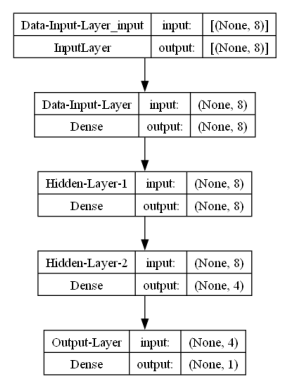

In [33]:
# Visualize the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plt.imshow(plt.imread('model_plot.png'))
plt.axis('off')

In [34]:
# Train the model
history = model.fit(train_images, 
                    train_labels, 
                    epochs          = 10, 
                    batch_size      = 32, 
                    validation_split= 0.2)


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.6233 - accuracy: 0.8462 - val_loss: 0.3073 - val_accuracy: 0.9148
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2947 - accuracy: 0.9160 - val_loss: 0.2527 - val_accuracy: 0.9282
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2425 - accuracy: 0.9306 - val_loss: 0.2157 - val_accuracy: 0.9393
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2080 - accuracy: 0.9411 - val_loss: 0.1920 - val_accuracy: 0.9469
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1815 - accuracy: 0.9484 - val_loss: 0.1703 - val_accuracy: 0.9513
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1613 - accuracy: 0.9547 - val_loss: 0.1572 - val_accuracy: 0.9565
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1444 - accuracy: 0.9591 - val_loss: 0.1467 - val_accuracy:

In [22]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 2.2914 - accuracy: 0.1135
Test accuracy: 0.11349999904632568


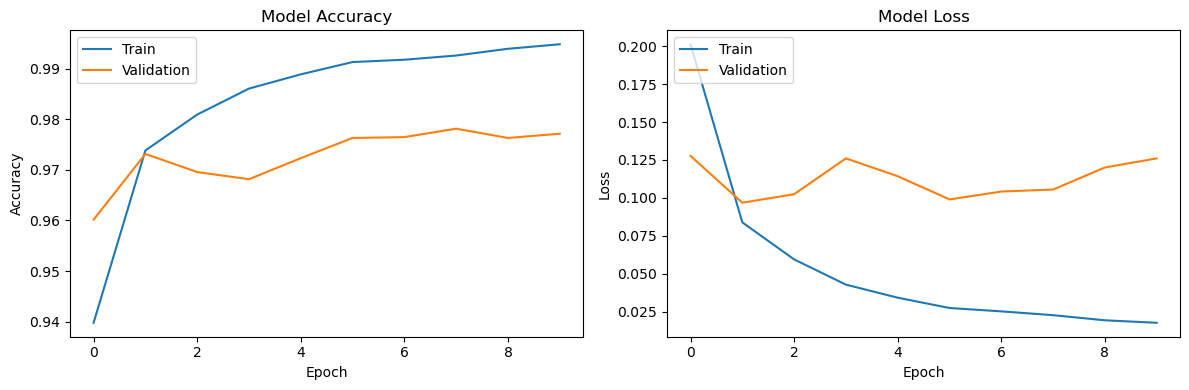

In [29]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()